In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import os

# Process the pdb file and summarize overall results to csv file

In [3]:
output_dir = "generation-results/dplm_650m"

plddt_dict = {
    'seq_idx': [],
    'length': [],
    'plddt': []
}

for pdb_foldername in os.listdir(os.path.join(output_dir, 'esmfold_pdb')):
    length = pdb_foldername.split('_')[3]
    for pdb_filename in os.listdir(os.path.join(output_dir, f'esmfold_pdb/{pdb_foldername}')):
        seq_idx = pdb_filename.split('_')[1]
        plddt = pdb_filename.split('_')[-1][:-4]
        plddt_dict['seq_idx'].append(int(seq_idx))
        plddt_dict['length'].append(int(length))
        plddt_dict['plddt'].append(float(plddt))
    
plddt_df = pd.DataFrame(plddt_dict).sort_values('length')
plddt_df = plddt_df.groupby('length', group_keys=False).apply(lambda x: x.sort_values('seq_idx'))
plddt_df.to_csv(os.path.join(output_dir, 'result.csv'))
plddt_df

    

/tmp/ipykernel_10800/1838829422.py:19: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  plddt_df = plddt_df.groupby('length', group_keys=False).apply(lambda x: x.sort_values('seq_idx'))


,seq_idx,length,plddt
0,0,100,73.436035
11,1,100,85.358810
22,2,100,47.136200
33,3,100,43.678627
34,4,100,74.624428
...,...,...,...
188,35,500,94.508049
189,36,500,91.406937
190,37,500,82.436523
191,38,500,87.450317


# Lineplot according to the sequence length

In [4]:
output_dir_list = ["generation-results/dplm_650m/result.csv"]
model_name_list = ['dplm_650m']
plddt_df_list = []
for i, output_dir in enumerate(output_dir_list):
    plddt_df = pd.read_csv(output_dir)
    plddt_df = plddt_df.groupby('length', as_index=False)['plddt'].mean()
    plddt_df['model'] = model_name_list[i]
    plddt_df_list.append(plddt_df)
plddt_df = pd.concat(plddt_df_list, ignore_index=True)
plddt_df

,length,plddt,model
0,100,70.241217,dplm_650m
1,200,83.125927,dplm_650m
2,300,85.899873,dplm_650m
3,400,84.032781,dplm_650m
4,500,83.599222,dplm_650m


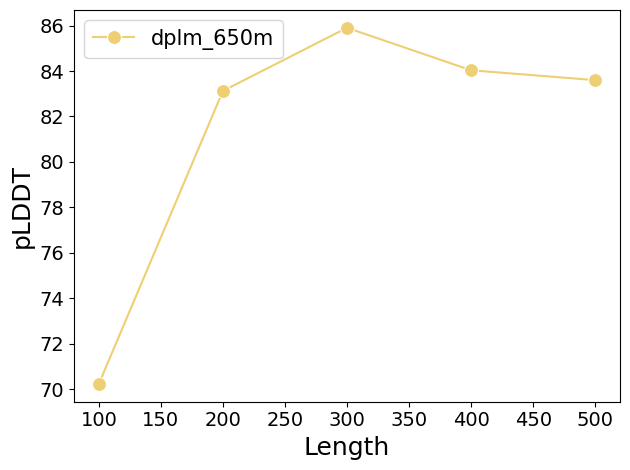

In [5]:
# Create scatter plot
palette_candidate = ['#EECF73', '#5FB1A5', '#F9633D']
palette = [palette_candidate[i] for i in range(len(model_name_list))]
markers_candidate = ['o', 'v', 's']
markers = [markers_candidate[i] for i in range(len(model_name_list))]
# palette = ['#8dd3c7', '#80b1d3', '#bebada']
sns.lineplot(data=plddt_df, x='length', y='plddt', hue='model', style='model', markers=markers,
             markersize=10, dashes=False, palette=palette)

# Adding labels and title
plt.xlabel('Length', fontdict={'size': 18})
plt.ylabel('pLDDT', fontdict={'size': 18})
plt.xticks(size=14)
plt.yticks(size=14)
plt.tight_layout()
plt.legend(title=None, prop={'size': 15})

# Show plot
plt.show()